# (Bikeshare Data)
## by (mohamed tahoun)

## Investigation Overview

> we study distriution of variabe and distriution between different variables in bikeshare system.

## Dataset Overview

> Bicycle-sharing systems allow users to rent bicycles on a very short-term basis for a price. This allows people to borrow a bike from point A and return it at point B, though they can also return it to the same location if they'd like to just go for a ride. Regardless, each bike can serve several users per day.Thanks to the rise in information technologies, it is easy for a user of the system to access a dock within the system to unlock or return bicycles. These technologies also provide a wealth of data that can be used to explore how these bike-sharing systems are used. this data is about bikeshare systems in Chicago.


In [20]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [21]:
# load in the dataset into a pandas dataframe
df_n = pd.read_csv('chicago1.csv')
print(df_n.head())

   Unnamed: 0           Start Time             End Time  Trip Duration  \
0     1423854  2017-06-23 15:09:32  2017-06-23 15:14:53            321   
1      955915  2017-05-25 18:19:03  2017-05-25 18:45:53           1610   
2        9031  2017-01-04 08:27:49  2017-01-04 08:34:45            416   
3      304487  2017-03-06 13:49:38  2017-03-06 13:55:28            350   
4       45207  2017-01-17 14:53:07  2017-01-17 15:02:01            534   

                   Start Station                   End Station   User Type  \
0           Wood St & Hubbard St       Damen Ave & Chicago Ave  Subscriber   
1            Theater on the Lake  Sheffield Ave & Waveland Ave  Subscriber   
2             May St & Taylor St           Wood St & Taylor St  Subscriber   
3  Christiana Ave & Lawrence Ave  St. Louis Ave & Balmoral Ave  Subscriber   
4         Clark St & Randolph St  Desplaines St & Jackson Blvd  Subscriber   

   Gender  Birth Year  
0    Male      1992.0  
1  Female      1992.0  
2    Male     

In [22]:
#delete nan values
df_n.dropna(inplace = True)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (trip duration distribution)

> Most of the trips are around 500 second.

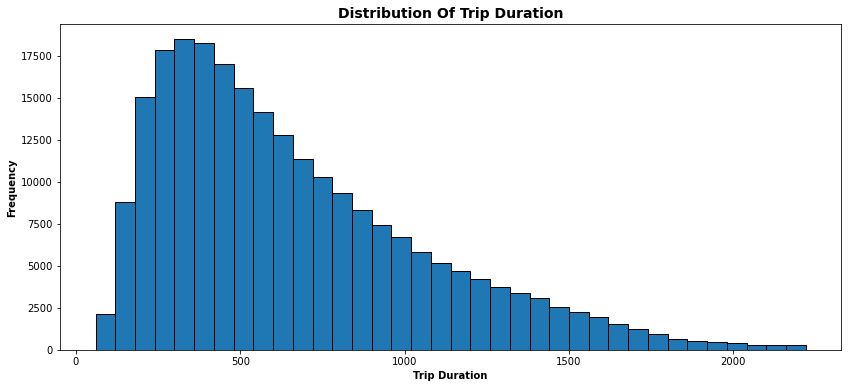

In [23]:
def myHistPlot(df, xVar ,bins = 30, figsize = [14,6]):
    # plot
    df[xVar].hist (bins=bins,
             grid=False,
             edgecolor='black',
             figsize=figsize);
    # for labels, add a space instead of underscore
    xVar=xVar.replace ("_"," ")
    # Add title and format it
    plt.title(f'Distribution of {xVar}'.title(), fontsize = 14, weight = "bold") 
    # Add x label and format it
    plt.xlabel(xVar.title(), fontsize = 10, weight = "bold")
    # Add y label and format it
    plt.ylabel ('Frequency'.title(), fontsize = 10, weight = "bold") 
bins = np.arange (df_n[ 'Trip Duration'].min(), df_n['Trip Duration'].quantile(0.99)+60, 60) 
myHistPlot(df_n,'Trip Duration', bins=bins)

## (User Type vs. Gender relation)

>it is clear that there is small number of customer male and female and that we must encourge pepole to converted to customers 

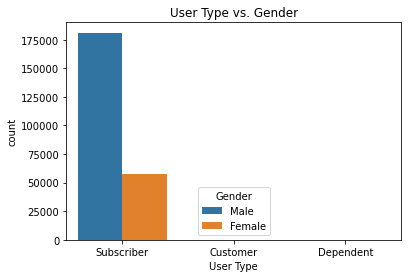

In [24]:
sb.countplot(data = df_n, x = 'User Type', hue = 'Gender');
plt.title("User Type vs. Gender");

## (Birth Year and Trip Duration with Gender relation)
> Young males are the ones who take longer trips and also With age, men tend to ride bicycles so offers must be made to them to attract them more


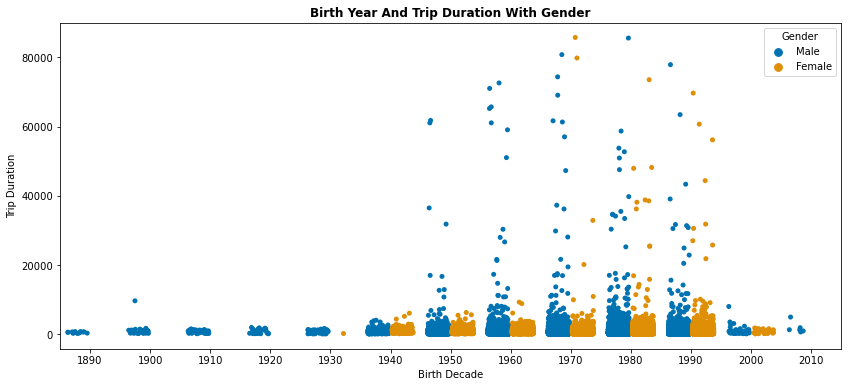

In [25]:
# create a birth decade variable, using floor division (lowest integer divisor)
df_n['Birth Decade']=( (df_n['Birth Year']//10 ) *10).astype (int)
                                                                       
#set plot dimensions
plt.figure (figsize=[14, 6] )
# plot
sb.stripplot(data = df_n, x = 'Birth Decade', y = 'Trip Duration', hue = 'Gender', 
              jitter=0.35, dodge=True, palette = 'colorblind');
plt.title('Birth Year and Trip Duration with Gender'.title(), weight="bold");

In [30]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook slide_deck_template.ipynb to slides
[NbConvertApp] Writing 651149 bytes to slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\ME\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\ME\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\ME\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\ME\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 346, in start
    self.convert_notebooks()
  File "C:\Users\ME\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 518, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "C:\Users\ME\a

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!